In [36]:
#Import the dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [38]:
#Define file path to read in the csv file

file_path = "Resources/blkjckhands_1.csv"

blackjack_df = pd.read_csv(Path(file_path))

blackjack_df.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,NaN
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,NaN
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,NaN
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,NaN
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,NaN


In [3]:
dlbustbeat = blackjack_df["dlbustbeat"].unique()
dlbustbeat

array(['Dlwin', 'Beat', 'PlBust', 'Bust', 'Push'], dtype=object)

In [4]:
blackjack_df.columns

Index(['Unnamed: 0', 'PlayerNo', 'card1', 'card2', 'card3', 'card4', 'card5',
       'sumofcards', 'dealcard1', 'dealcard2', 'dealcard3', 'dealcard4',
       'dealcard5', 'sumofdeal', 'blkjck', 'winloss', 'plybustbeat',
       'dlbustbeat', 'plwinamt', 'dlwinamt', 'ply2cardsum'],
      dtype='object')

In [6]:
blackjack_df.columns

Index(['Unnamed: 0', 'PlayerNo', 'card1', 'card2', 'card3', 'card4', 'card5',
       'sumofcards', 'dealcard1', 'dealcard2', 'dealcard3', 'dealcard4',
       'dealcard5', 'sumofdeal', 'blkjck', 'winloss', 'plybustbeat',
       'dlbustbeat', 'plwinamt', 'dlwinamt', 'ply2cardsum'],
      dtype='object')

In [7]:
blackjack_df['PlayershandsPlayed'] = (blackjack_df[['card1', 'card2', 'card3', 'card4', 'card5']] > 0).sum(axis=1)
player_hands = blackjack_df["PlayershandsPlayed"]


In [8]:

two_hands = []
three_hands = []
four_hands = []
five_hands = []


for i in player_hands:
    if i  == 2:
        two_hands.append(i)
    elif i  == 3:
        three_hands.append(i)
    elif i  == 4:
        four_hands.append(i)
    elif i == 5:
        five_hands.append(i)


print(f"Hands with 2 cards: {len(two_hands)}")
print(f"Hands with 3 cards: {len(three_hands)}")
print(f"Hands with 4 cards: {len(four_hands)}")
print(f"Hands with 5 cards: {len(five_hands)}")

Hands with 2 cards: 181297
Hands with 3 cards: 148155
Hands with 4 cards: 48757
Hands with 5 cards: 7661


In [9]:
pct_two_hands = len(two_hands)/len(player_hands) * 100
pct_three_hands = len(three_hands)/len(player_hands) * 100
pct_four_hands = len(four_hands)/len(player_hands) * 100
pct_five_hands = len(five_hands)/len(player_hands) * 100

print(f"% two hands: {pct_two_hands}")
print(f"% three hands: {pct_three_hands}")
print(f"% four hands: {pct_four_hands}")
print(f"% five hands: {pct_five_hands}")


% two hands: 46.983958327934275
% three hands: 38.395055329515124
% four hands: 12.635602664109674
% five hands: 1.9853836784409256


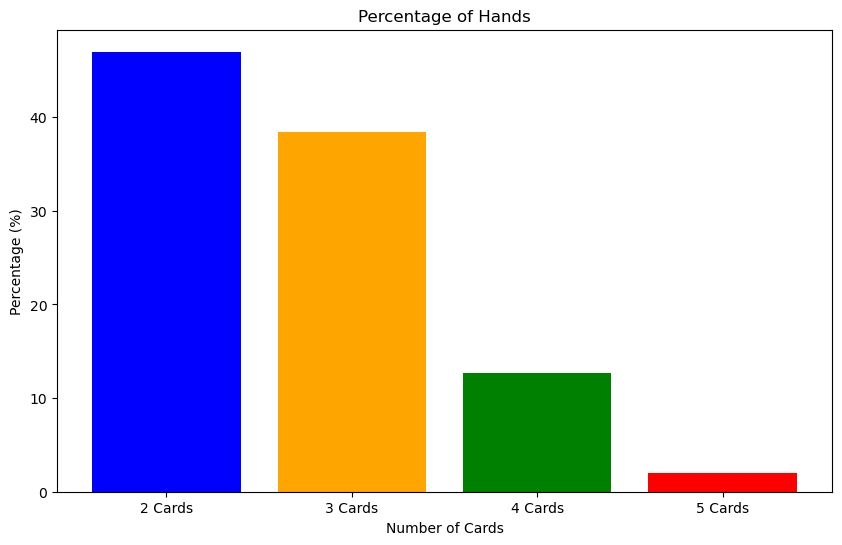

In [29]:
categories = ['2 Cards', '3 Cards', '4 Cards', '5 Cards']
percentages = [pct_two_hands, pct_three_hands, pct_four_hands, pct_five_hands]

plt.figure(figsize=(10, 6))
plt.bar(categories, percentages, color=['blue', 'orange', 'green', 'red'])

plt.title('Percentage of Hands')
plt.xlabel('Number of Cards')
plt.ylabel('Percentage (%)')

plt.savefig('percentage_of_hands.png', format='png')
plt.show()

In [11]:
# array(['Dlwin', 'Beat', 'PlBust', 'Bust', 'Push'], dtype=object)
dealer_win = []
player_win = []
player_bust = []
dealer_bust = []
push = []


player_outcome = blackjack_df["dlbustbeat"]

for i in player_outcome:
    if i == "Dlwin":
        dealer_win.append(i)
    elif i == "Beat":
        player_win.append(i)
    elif i == "PlBust":
        player_bust.append(i)
    elif i == "Bust":
        player_bust.append(i)
    elif i == "Push":
        player_bust.append(i)



In [12]:
grouped = blackjack_df.groupby(['plybustbeat', 'PlayershandsPlayed']).size().unstack(fill_value=0)

# Calculate total counts per outcome
total_counts = grouped.sum(axis=1)

# Calculate the percentage of hands for each number of cards within each outcome
percentages = grouped.div(total_counts, axis=0) * 100

# Print results
print("Counts:")
print(grouped)
print("\nPercentages:")
print(percentages)

# Example of how to get the percentage of three-card hands that were 'Bust'
bust_counts = grouped.loc['Bust']
total_busts = total_counts['Bust']
pct_three_card_busts = (bust_counts.get(3, 0) / total_busts) * 100
print(f"Percentage of 'Bust' with three hands: {pct_three_card_busts:.2f}%")

Counts:
PlayershandsPlayed      2      3      4     5
plybustbeat                                  
Beat                66474  37570   9021  1784
Bust                    0  42834  22829  3449
DlBust              56761  29670   6167  1013
Plwin               38870  25246   7182   933
Push                19192  12835   3558   482

Percentages:
PlayershandsPlayed          2          3          4         5
plybustbeat                                                  
Beat                57.879477  32.712518   7.854661  1.553344
Bust                 0.000000  61.977659  33.031890  4.990450
DlBust              60.634968  31.694993   6.587901  1.082138
Plwin               53.813460  34.951752   9.943099  1.291689
Push                53.212078  35.586547   9.864974  1.336402
Percentage of 'Bust' with three hands: 61.98%


In [13]:
#I had to change the datatype for 'winloss' column by creating a new column with integerest
winloss_mapping = {'Win': 1, 'Loss': 0, 'Push': 0.5}

blackjack_df['winloss_numeric'] = blackjack_df['winloss'].map(winloss_mapping)

In [14]:
#Find which first hand is the most common for wins

blackjack_df['sum_card1_card2'] = blackjack_df['card1'] + blackjack_df['card2']

win_loss_summary = blackjack_df.groupby('sum_card1_card2')['winloss_numeric'].agg(['mean', 'count']).reset_index()
win_loss_summary.rename(columns={'mean': 'win_percentage', 'count': 'total_games'}, inplace=True)

best_combination = win_loss_summary.loc[win_loss_summary['win_percentage'].idxmax()]
print(f"The combination of the first two cards with the highest win percentage is {best_combination['sum_card1_card2']} with a win percentage of {best_combination['win_percentage']:.2%}.")

The combination of the first two cards with the highest win percentage is 21.0 with a win percentage of 94.19%.


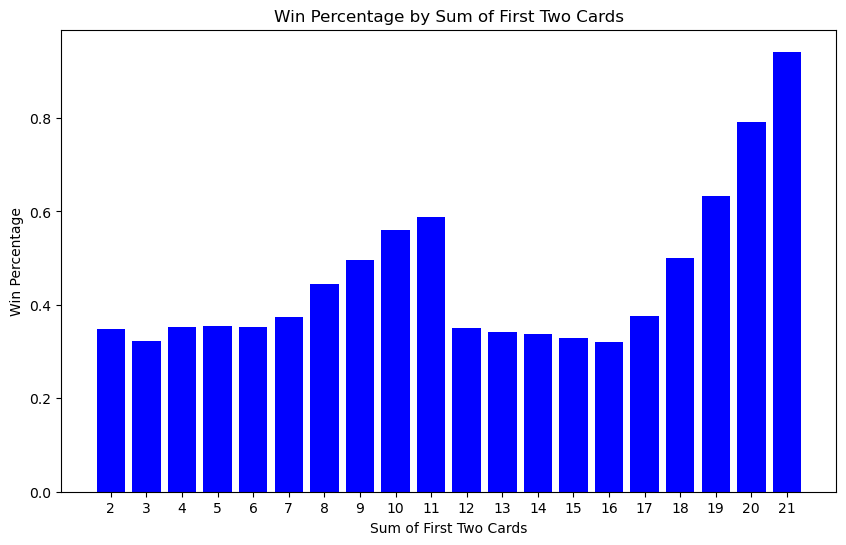

In [30]:
#Most common first two cards for wins

plt.figure(figsize=(10, 6))
plt.bar(win_loss_summary['sum_card1_card2'], win_loss_summary['win_percentage'], color='blue')


plt.xticks(win_loss_summary['sum_card1_card2'].unique()) 

plt.xlabel('Sum of First Two Cards')
plt.ylabel('Win Percentage')
plt.title('Win Percentage by Sum of First Two Cards')

plt.savefig('WinPercentagebySumofFirstTwoCards.png', format='png')
plt.show()

In [16]:
#Find which number of hands is the most common for wins.
hands_played_summary = blackjack_df.groupby('PlayershandsPlayed')['winloss_numeric'].agg(['mean', 'count']).reset_index()
hands_played_summary.rename(columns={'mean': 'win_percentage', 'count': 'total_games'}, inplace=True)

best_hands_played = hands_played_summary.loc[hands_played_summary['win_percentage'].idxmax()]
print(f"The number of hands played with the highest win percentage is {best_hands_played['PlayershandsPlayed']} with a win percentage of {best_hands_played['win_percentage']:.2%}.")

The number of hands played with the highest win percentage is 2.0 with a win percentage of 58.04%.


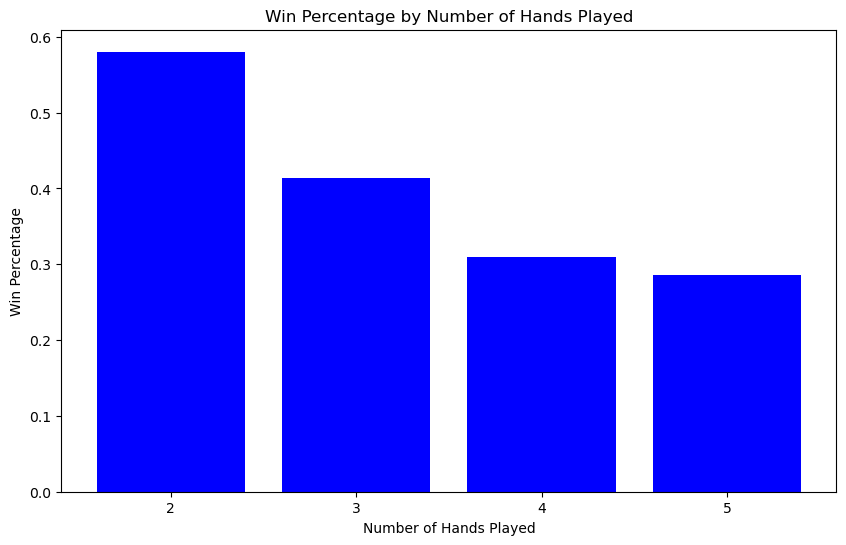

In [31]:
#Plot the number of hands for wins
plt.figure(figsize=(10, 6))
plt.bar(hands_played_summary['PlayershandsPlayed'], hands_played_summary['win_percentage'], color='blue')
plt.xlabel('Number of Hands Played')
plt.ylabel('Win Percentage')
plt.xticks([2, 3, 4, 5])
plt.title('Win Percentage by Number of Hands Played')

plt.savefig('WinPercentagebyNumberofHandsPlayed.png', format='png')
plt.show()

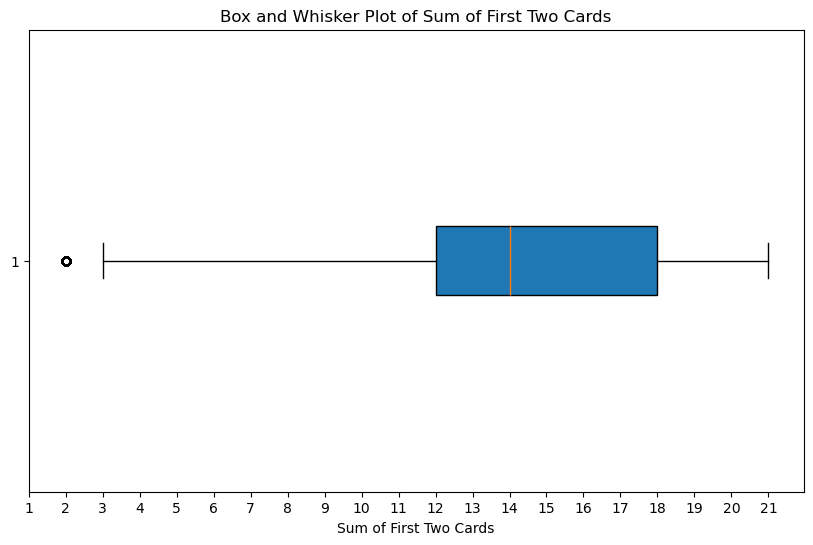

In [32]:
plt.figure(figsize=(10, 6))
plt.boxplot(blackjack_df['sum_card1_card2'], vert=False, patch_artist=True)


plt.xlabel('Sum of First Two Cards')
plt.title('Box and Whisker Plot of Sum of First Two Cards')
#plt.grid(axis='x')
plt.xticks(range(1, 22))

plt.savefig('BoxandWhiskerPlotofFirstHandCards.png', format='png')
plt.show()

In [19]:
#The summary statistic on average for each player card vs dealer card is interesting. 
print(blackjack_df.describe())

          Unnamed: 0          card1          card2         card3  \
count  385870.000000  385870.000000  385870.000000  385870.00000   
mean        2.499990       7.126815       7.087172       1.95854   
std         1.707825       2.996846       3.008133       3.53539   
min         0.000000       1.000000       1.000000       0.00000   
25%         1.000000       5.000000       4.000000       0.00000   
50%         2.000000       8.000000       8.000000       0.00000   
75%         4.000000      10.000000      10.000000       2.00000   
max         5.000000      11.000000      11.000000      11.00000   

               card4          card5     sumofcards      dealcard1  \
count  385870.000000  385870.000000  385870.000000  385870.000000   
mean        2.344663       0.389953      18.907142       7.186358   
std         3.660152       1.731771       3.209811       2.979597   
min         0.000000       0.000000       8.000000       1.000000   
25%         0.000000       0.000000      1

In [20]:
#convert the string data
numeric_df = blackjack_df.select_dtypes(include=[float, int])

In [21]:
#This shows the correlation between the x-axis variable and the y-axis variable
#I dropped the 'plycardsum' column because of NaN values

correlations = numeric_df.drop(columns=['ply2cardsum']).corr()

print(correlations)

                      Unnamed: 0     card1     card2     card3     card4  \
Unnamed: 0          1.000000e+00  0.002772  0.000828 -0.002079  0.000151   
card1               2.771520e-03  1.000000  0.089000 -0.534382 -0.252128   
card2               8.277289e-04  0.089000  1.000000 -0.541500 -0.245571   
card3              -2.078781e-03 -0.534382 -0.541500  1.000000 -0.055777   
card4               1.512746e-04 -0.252128 -0.245571 -0.055777  1.000000   
card5              -2.333392e-03 -0.121355 -0.124081 -0.029998 -0.006568   
sumofcards         -1.270364e-05  0.075499  0.076868  0.015241  0.609781   
dealcard1           6.491031e-06 -0.001674 -0.000752  0.001547  0.325909   
dealcard2           6.372920e-06 -0.002242 -0.001868  0.002491  0.012539   
dealcard3          -9.221061e-07 -0.000059 -0.001229 -0.000202 -0.183517   
dealcard4          -5.228834e-06  0.003706  0.001470 -0.004001 -0.108809   
dealcard5           1.027473e-06  0.000265  0.001677 -0.000107 -0.050009   
sumofdeal   

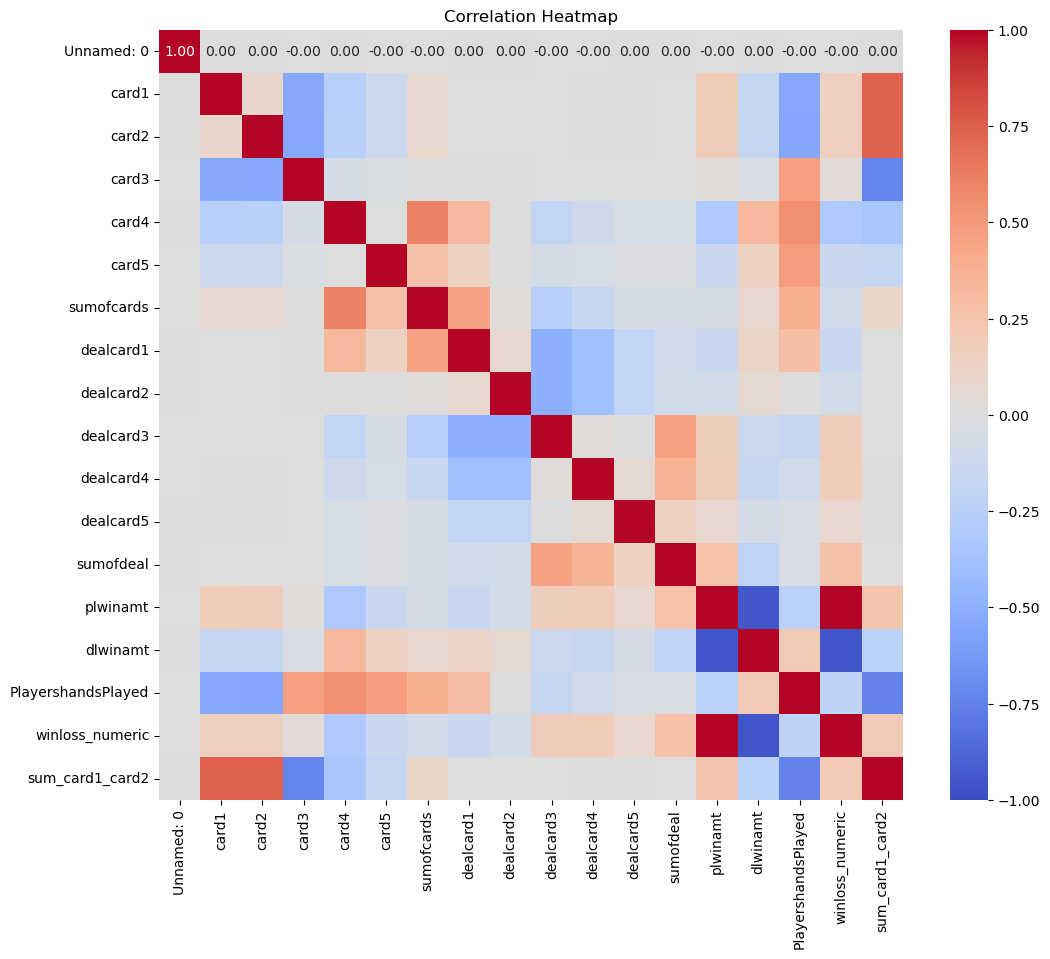

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.savefig('HeatMapofCorrelation.png', format='png')
plt.show()

In [23]:
#This shows a negative correlation for the number of hands played to wins

hands_correlation = numeric_df[['PlayershandsPlayed', 'winloss_numeric']].corr()
print(hands_correlation)

                    PlayershandsPlayed  winloss_numeric
PlayershandsPlayed            1.000000        -0.213145
winloss_numeric              -0.213145         1.000000


In [24]:
cards_correlation = numeric_df[['card1', 'card2', 'card3', 'card4', 'card5', 'winloss_numeric']].corr()
cards_correlation_winloss = correlations['winloss_numeric'][['card1', 'card2', 'card3', 'card4', 'card5']]

# Print the correlations for verification
print(cards_correlation_winloss)

cards_correlation.head(10)

card1    0.161153
card2    0.158396
card3    0.034123
card4   -0.312526
card5   -0.136524
Name: winloss_numeric, dtype: float64


,card1,card2,card3,card4,card5,winloss_numeric
card1,1.000000,0.089000,-0.534382,-0.252128,-0.121355,0.161153
card2,0.089000,1.000000,-0.541500,-0.245571,-0.124081,0.158396
card3,-0.534382,-0.541500,1.000000,-0.055777,-0.029998,0.034123
card4,-0.252128,-0.245571,-0.055777,1.000000,-0.006568,-0.312526
card5,-0.121355,-0.124081,-0.029998,-0.006568,1.000000,-0.136524
winloss_numeric,0.161153,0.158396,0.034123,-0.312526,-0.136524,1.000000


In [25]:
#cards_correlation = cards_correlation([cards_correlation.index] != "winloss_numeric")
cards_correlation = cards_correlation.drop('winloss_numeric')

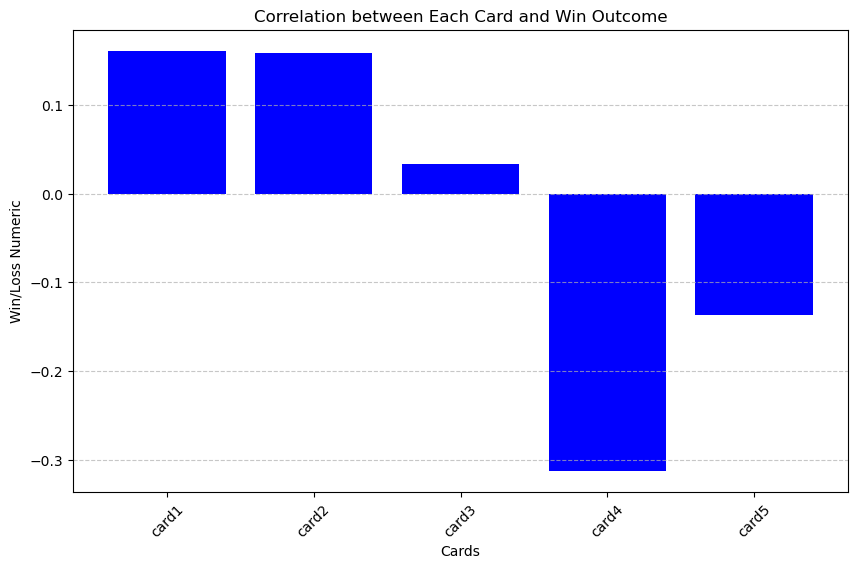

In [34]:
x = cards_correlation.index
y = cards_correlation["winloss_numeric"]

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='blue')
plt.xlabel('Cards')
plt.ylabel('Win/Loss Numeric')
plt.title('Correlation between Each Card and Win Outcome')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('CorrelationBetweenHandsandWins.png', format='png')
plt.show()

In [27]:
#player_hands = blackjack_df["PlayershandsPlayed"]
#winloss_mapping = {'Win': 1, 'Loss': 0, 'Push': 0.5}

#hands_correlation = blackjack_df[['winloss_numeric', 'PlayershandsPlayed']].corr().loc['winloss_numeric', 'PlayershandsPlayed']

#print(f"Correlation between win outcome and number of hands played: {hands_correlation:.2f}")

In [28]:
### Fix this. The loc function above is not the right way to do it.

#plt.figure(figsize=(8, 6))
#plt.bar(['Correlation'], [hands_correlation], color='skyblue')
#plt.title('Correlation between Win Outcome and Number of Hands Played')
#plt.ylabel('Correlation Coefficient')
#plt.ylim(-1, 1)  # Set y-axis limits to better visualize the correlation range
#plt.xticks(['PlayershandsPlayed'])  # Label x-axis with 'PlayershandsPlayed'
#plt.show()